# <div style="padding: 15px; background-color: #D0A2F7; margin: 15px; color: #000000; font-family: 'New Times Roman', serif; font-size: 110%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Assignment: PCA Implementation</div>

# <div style="padding: 10px; background-color: #FF4949; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 60%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Objective:</div>
**The objective of this assignment is to implement PCA on a given dataset and analyse the results.**

# <div style="padding: 10px; background-color: #82CD47; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 60%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Instructions:</div>

-    Download the [wine](https://archive.ics.uci.edu/ml/datasets/Wine) dataset from the UCI Machine Learning Repository
-    Load the dataset into a Pandas dataframe.
-    Split the dataset into features and target variables.
-    Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
-    Implement PCA on the preprocessed dataset using the scikit-learn library.
-    Determine the optimal number of principal components to retain based on the explained variance ratio.
-    Visualise the results of PCA using a scatter plot.
-    Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
-    Interpret the results of PCA and clustering analysis.

# <div style="padding: 10px; background-color: #82CD47; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 60%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Deliverables:</div>
-    Jupyter notebook containing the code for the PCA implementation.
-    A report summarising the results of PCA and clustering analysis.
-    Scatter plot showing the results of PCA.
-    A table showing the performance metrics for the clustering algorithm.

# <div style="padding: 10px; background-color: #64CCC5; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 60%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Additional Information</div>
-    You can use the python programming language.
-    You can use any other machine learning libraries or tools as necessary.
-    You can use any visualisation libraries or tools as necessary.

# <div style="padding: 10px; background-color: #29ADB2; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 70%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Importing Imp. Libraries </div>

In [203]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


In [204]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# <div style="padding: 10px; background-color: #29ADB2; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 70%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Importing Data </div>

In [206]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

# <div style="padding: 10px; background-color: #29ADB2; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 70%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> EDA and cleaning</div>

In [207]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [208]:
X.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [209]:
len(X.columns)

13

In [210]:
X.shape

(178, 13)

In [211]:
def plot_boxplot_and_hist(data, variable):
    
    # creating a figure composed of two matplotlib.Axes 
    # objects (ax_box and ax_hist)
    
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

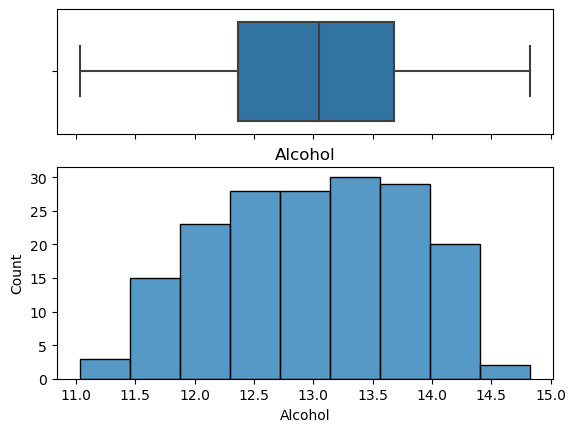

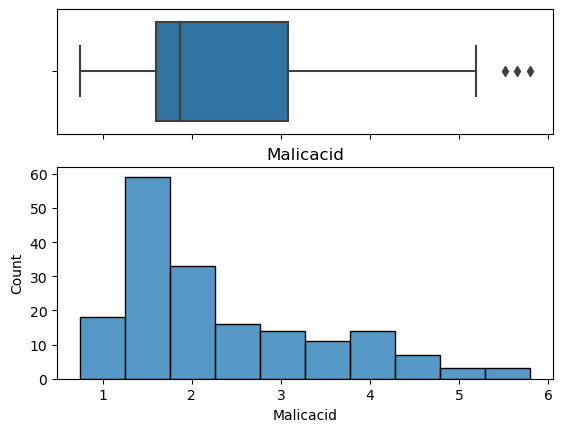

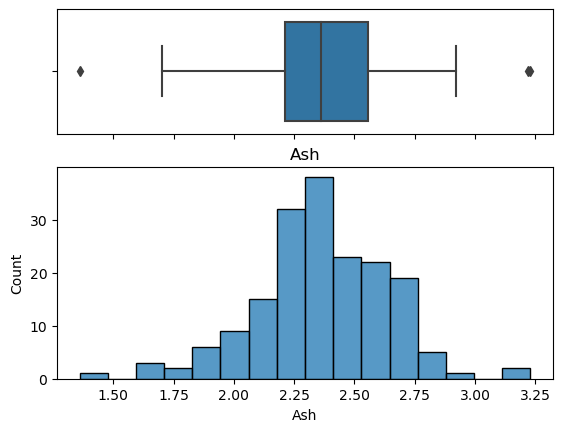

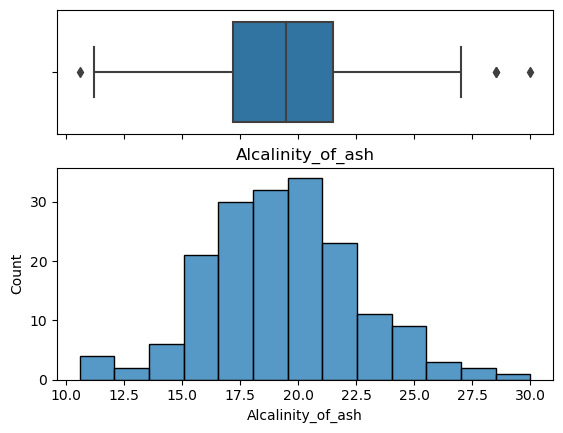

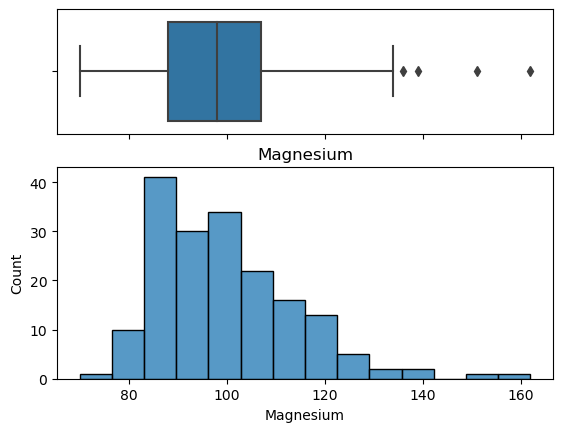

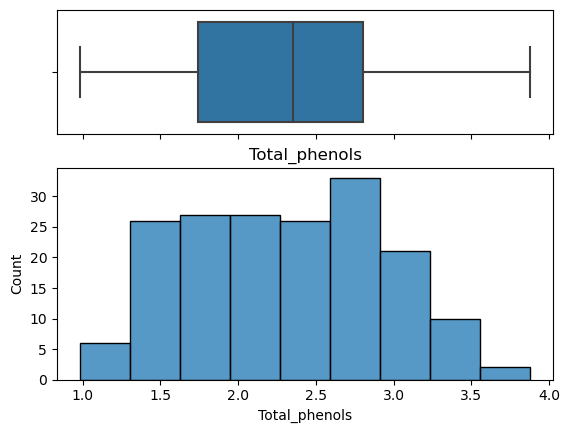

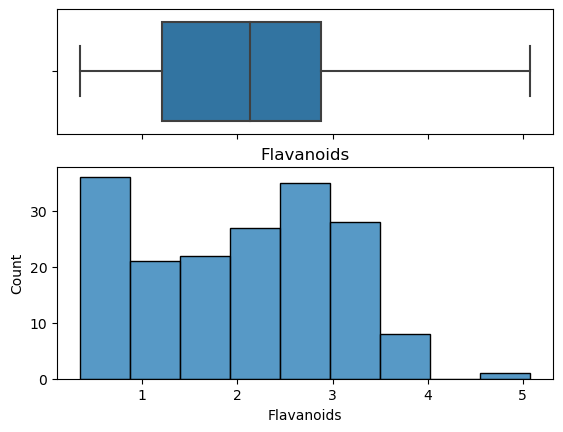

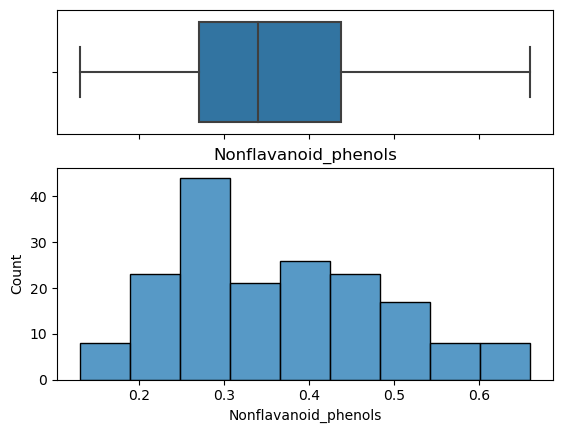

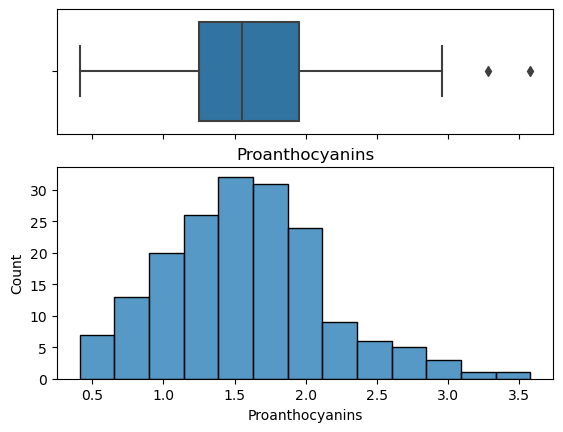

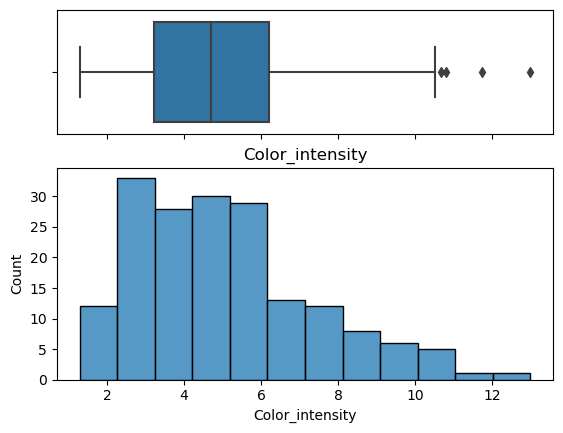

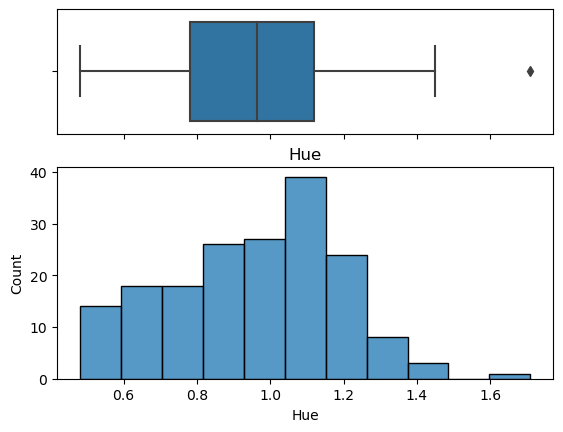

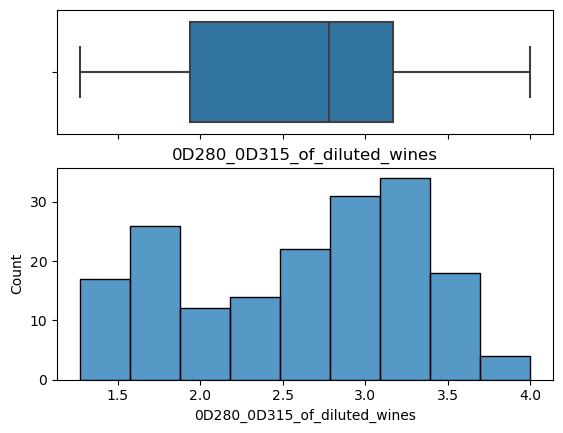

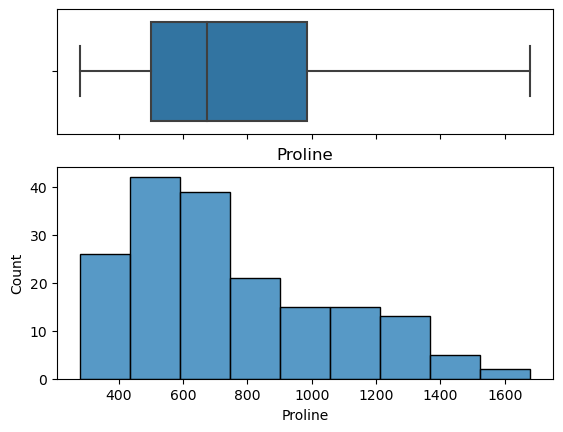

In [212]:
for variable in X.columns:
    plot_boxplot_and_hist(X, variable)

**Most of the colums normaly distributed and not have too much outiler , but those columns which have ['Malicacid', 'Ash', 'Alcalinity_of_ash','Magnesium','Proanthocyanins', 'Color_intensity', 'Hue'] so we caN CRAP them and remove from those columns where it have less.**

# <div style="padding: 10px; background-color: #29ADB2; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 70%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Feature Engeeniring</div>

In [213]:
# From feature engine
from feature_engine.outliers import OutlierTrimmer

capper = OutlierTrimmer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=['Malicacid', 'Ash', 'Alcalinity_of_ash','Magnesium','Proanthocyanins', 'Color_intensity', 'Hue'])

X = capper.fit_transform(X)

# <div style="padding: 10px; background-color: #29ADB2; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 70%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Splitting the dataset into the Training set and Test set </div>
**In PCA, the target variable (y in this case) is not used during the dimensionality reduction process. PCA focuses solely on the features to capture the maximum variance in the data.We do'nt need spliting data in traing and testing**

# <div style="padding: 10px; background-color: #29ADB2; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 70%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Feature Scaling </div>

In [214]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# <div style="padding: 10px; background-color: #29ADB2; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 70%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Training the PCA model on the Training set </div>

In [215]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# <div style="padding: 10px; background-color: #29ADB2; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 70%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Determine Optimal Number of Principal Components: </div>

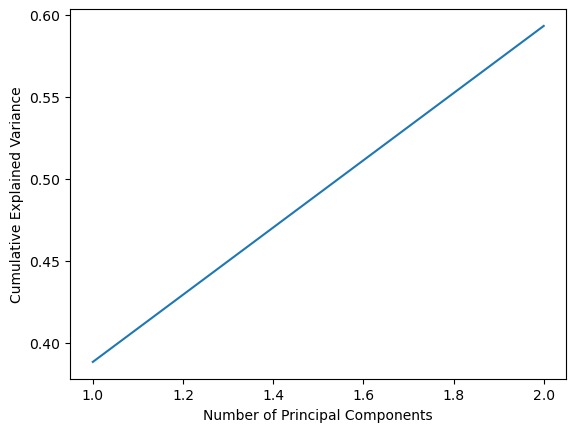

In [216]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


# <div style="padding: 10px; background-color: #29ADB2; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 70%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Visualize PCA Results: </div>

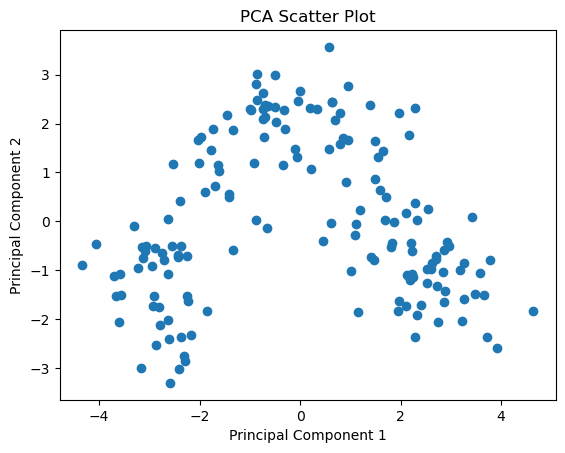

In [217]:
plt.scatter(X_pca[:, 0], X_pca[:, 1] ,cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()


# <div style="padding: 10px; background-color: #29ADB2; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 70%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Perform K-Means Clustering:</div>

In [218]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(X_pca)

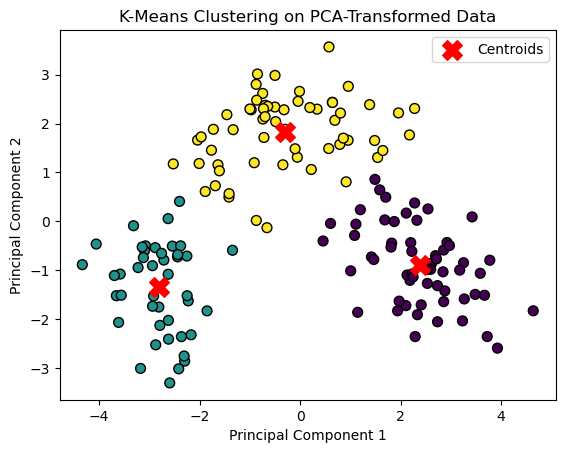

In [219]:
import matplotlib.pyplot as plt

# Scatter plot of the first two principal components, colored by cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.legend()
plt.show()


# <div style="padding: 10px; background-color: #29ADB2; margin: 10px; color: #000000; font-family: 'New Times Roman', serif; font-size: 70%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> Interpret Results: </div>

In [220]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5720028903237931


The silhouette score is a measure of how well-separated clusters are in a clustering result. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

A silhouette score of 0.572 indicates a reasonably good separation between clusters. Here's how to interpret the silhouette score:

- **0.572 (close to 1):** This suggests that the clusters are well-separated, and each data point is relatively close to the other points in its own cluster compared to the points in other clusters.

- **Positive Value:** A positive silhouette score indicates that the clusters are well-defined and appropriately assigned.

- **Closer to 1:** The closer the silhouette score is to 1, the better the clustering. A score of 1 would mean that the clusters are very distinct with little overlap.

Keep in mind that while a silhouette score can give you an indication of the quality of the clustering, it should be considered alongside domain knowledge and possibly other evaluation metrics depending on the specific characteristics of your data.

If you're working on an unsupervised problem, like clustering, where you might not have ground truth labels, the silhouette score can be a helpful quantitative measure to evaluate the performance of your clustering algorithm.

# <div style="padding: 15px; background-color: #D2E0FB; margin: 15px; color: #000000; font-family: 'New Times Roman', serif; font-size: 110%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: bold;"> ***...Complete...***</div>